In [1]:
import torch
from torch.utils.data import Dataset, Subset, DataLoader
from torchvision import datasets, transforms
from torchvision.io import read_image
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import importlib

import utils

importlib.reload(utils)  # reload the module so changes are applied

<module 'utils' from '/Users/wesleychou/Documents/GitHub/traffic-detection/utils.py'>

In [2]:
label_map = {
    0: '20_speed',
    1: '30_speed',
    2: '50_speed',
    3: '60_speed',
    4: '70_speed',
    5: '80_speed',
    6: '80_lifted',
    7: '100_speed',
    8: '120_speed',
    9: 'no_overtaking_general',
    10: 'no_overtaking_trucks',
    11: 'right_of_way_crossing',
    12: 'right_of_way_general',
    13: 'give_way',
    14: 'stop',
    15: 'no_way_general',
    16: 'no_way_trucks',
    17: 'no_way_one_way',
    18: 'attention_general',
    19: 'attention_left_turn',
    20: 'attention_right_turn',
    21: 'attention_curvy',
    22: 'attention_bumpers',
    23: 'attention_slippery',
    24: 'attention_bottleneck',
    25: 'attention_construction',
    26: 'attention_traffic_light',
    27: 'attention_pedestrian',
    28: 'attention_children',
    29: 'attention_bikes',
    30: 'attention_snowflake',
    31: 'attention_deer',
    32: 'lifted_general',
    33: 'turn_right',
    34: 'turn_left',
    35: 'turn_straight',
    36: 'turn_straight_right',
    37: 'turn_straight_left',
    38: 'turn_right_down',
    39: 'turn_left_down',
    40: 'turn_circle',
    41: 'lifted_no_overtaking_general',
    42: 'lifted_no_overtaking_trucks'
}

Load data

In [3]:
train_dir = "gtsrb-small/train"
test_dir = "gtsrb-small/test"

transform = transforms.Compose([
    transforms.Resize(size=(32, 32)),
    transforms.ToTensor()
])

# load data to ImageFolder
train_data = datasets.ImageFolder(root=train_dir, transform=transform)
test_data = datasets.ImageFolder(root=test_dir, transform=transform)

print("Length of train_data:", len(train_data))
print("Length of test_data:", len(test_data))
class_names = [label_map[int(item)] for item in train_data.classes]
print("class names:", class_names)



Length of train_data: 594
Length of test_data: 66
class names: ['20_speed', 'attention_pedestrian', 'turn_straight_left']


Text(0.5, 1.0, '2')

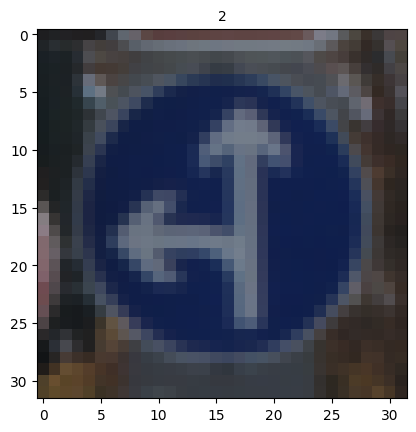

In [8]:
# utils.show_random_images(train_data, 10)
plt.imshow(train_data[454][0].permute(1,2,0))
# plt.title(label_map[train_data[454][1]], fontsize=10)
plt.title(train_data[454][1], fontsize=10)

In [5]:
"""
TODO:
- get gtsrb dataset in png
- split to train, test, cv
- train model

After that,
get U.S. traffic signs from google images and use data augmentation.
this will become our dataset
"""

'\nTODO:\n- get gtsrb dataset in png\n- split to train, test, cv\n- train model\n\nAfter that,\nget U.S. traffic signs from google images and use data augmentation.\nthis will become our dataset\n'